In [1]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# allow plots to appear directly in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Introduction**

The authors of the following research paper:

>Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis, “Modeling wine preferences by data mining from physicochemical properties”, _Decision Support Systems_, vol. 47, no. 4:547-553, 2009.

considered  the  problem  of  modeling  wine  preferences.   Wine  can  be  evaluated  by  experts  who give  a  subjective  score,  and  the  question  the  authors  of  this  paper  considered  was  how  to  build a model that relates objective features of the wine (e.g., pH values) to its rated quality. 

<p>In this project, I am interested to predict the  quality of the wine from features of the wine. The features of the wine.  I will fit a linear regression to the features of the wine to predict the quality of the wine.</p>





# **Understanding the dataset**

## **Structure of the data**

The dataset that will be used is stored in <code>df</code>. The dataset is a csv file.

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The dataset contains 1599 tows and 12 columns.

In [3]:
print("Row:",df.shape[0])
print("Column:",df.shape[1])

Row: 1599
Column: 12


The dataset contains no NA values.

In [4]:
print("Total NA values in the dataset:",df.isnull().sum().sum(), "entry")

Total NA values in the dataset: 0 entry


## **Granularity**

Each row of the dataset represents the features of a single wine.

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## **Variables**

The variables from each columns are quantitative continuous, except for quality (i.e., quality is qualitative ordinal)

# **Modeling training data**

## **Multiple Linear Regression**

The design matrix <code>X</code> will contain the features of the wine and <code>Y</code> will contain the value that we want to predict (i.e., the quality of the wine)

In [6]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,11].to_numpy()

I split the dataset into training set (90% of the data) and test set (10% of the data)

In [7]:
from sklearn.model_selection import train_test_split

# Random state is for reproducibility purposes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

Now, I will fit the model and predict the quality of the wine.

In [8]:
# Fit the model

linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)
y_fitted = linear_model.predict(X_train)

In [9]:
# Printing the coefficient

print("Intercept:",linear_model.intercept_)
print("Coef:",linear_model.coef_)

Intercept: 21.13255032686859
Coef: [ 2.25927798e-02 -1.04214422e+00 -1.03974475e-01  1.33101561e-02
 -1.76414361e+00  4.62739928e-03 -3.24754611e-03 -1.72396293e+01
 -3.42743209e-01  8.76382340e-01  2.71548817e-01]


Now, we will calculate the RMSE to assess the perfomance of the model.

In [10]:
def rmse(predicted, actual):
    """
    Calculates RMSE from actual and predicted values
    Input:
      predicted (1D array): vector of predicted/fitted values
      actual (1D array): vector of actual values
    Output:
      a float, the root-mean square error
    """
    return np.sqrt(np.mean((actual - predicted)**2))

In [11]:
print("Training set RMSE:",rmse(y_fitted,y_train))

Training set RMSE: 0.6486289801623697


The **$R^2$** of the model is:

In [12]:
# Calculating R^2
linear_model.score(X_train,y_train)

0.35253679884718236

The **$R^2$** on this model is very low. It seems that linear regression does not fit the data appropriately. 

## **Ridge Regression**

I want to incorporate Ridge Regression in the model and see whether the perfomance of the model is better or not. 




In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV

I will use cross validation method for picking the best <code>alpha</code>. Then, I will proceed fitting the Ridge Regression into the model.

In [14]:
# Define cross validation method

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [15]:
# Define model
linear_model_l2= RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv)
linear_model_l2.fit(X_train,y_train)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42),
        fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [16]:
# Summarize chosen configuration
print('alpha: %f' % linear_model_l2.alpha_)

alpha: 0.200000


In [17]:
# Predict using the model

y_fitted_l2 = linear_model_l2.predict(X_train)

In [18]:
# Printing the coefficient

print("Intercept:",linear_model_l2.intercept_)
print("Coef:",linear_model_l2.coef_)

Intercept: 4.248569726706463
Coef: [ 0.00779049 -1.05905425 -0.11113112  0.00589724 -1.64784726  0.00477421
 -0.00326587 -0.0759702  -0.41375384  0.83473224  0.28879124]


In [19]:
print("Training set RMSE:",rmse(y_fitted_l2,y_train))

Training set RMSE: 0.648787249064685


In [20]:
# Calculating R^2
linear_model_l2.score(X_train,y_train)

0.3522207914060015

It seems that the model is doing slightly better using Ridge Regression. But, the model does not fit the data properly.

## **Linear regression? Is it a good choice?**

To visualize the cause of low **$R^2$**, let us visualize the relationship between some of the features and response using the scatterplot.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


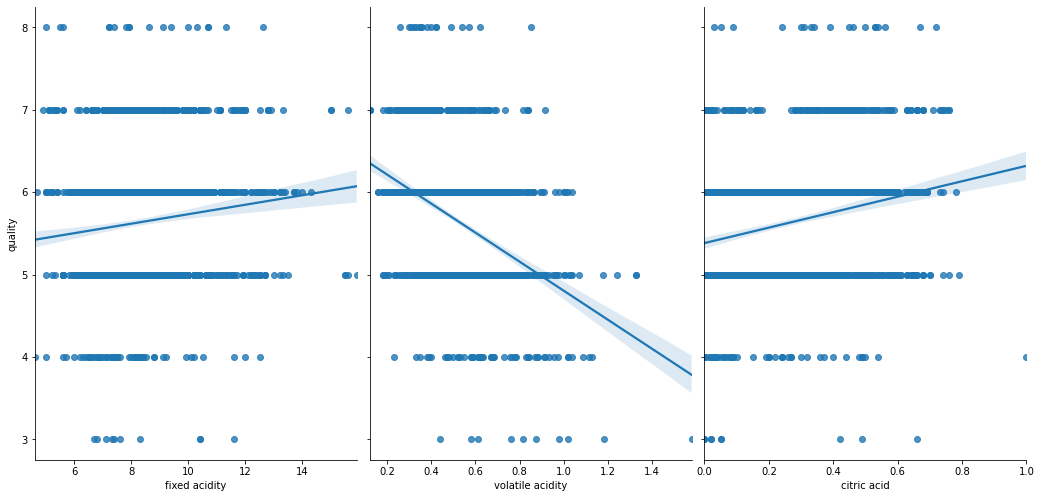

In [21]:
sns.pairplot(df, x_vars=df.columns[0:3], y_vars="quality", size=7, aspect=0.7, kind='reg');

It seems that using linear regression is not a good choice to fit the data. This is because the y-values of the data only takes integer. 

## **Decision trees**

Since the quality of the wine is qualitative ordinal and takes only integer, decision trees should fit the model well enough. 

In [22]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

To avoid overfitting the data, I will use random forest. The process is described below:

In [23]:
# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=250, random_state=1)

In [24]:
# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
# Printing the first five y_pred
print(y_pred[0:5])

[5 5 5 5 6]


In [25]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct in the test sets?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.70625


Overall, the model is doing decently in predicting the quality of the wine. It is definitely better than using linear regression.

## **Finding important features**

Here, I am finding the important features or selecting features in the dataset.

In [26]:
feature_imp = pd.Series(clf.feature_importances_,index=df.columns[:-1]).sort_values(ascending=False)
feature_imp

alcohol                 0.148170
sulphates               0.108770
total sulfur dioxide    0.104420
volatile acidity        0.104204
density                 0.089286
chlorides               0.083043
citric acid             0.075624
fixed acidity           0.073698
pH                      0.072912
residual sugar          0.071167
free sulfur dioxide     0.068705
dtype: float64

I can visualize the feature importance in a bar graph to make it easier to understand and interpret.

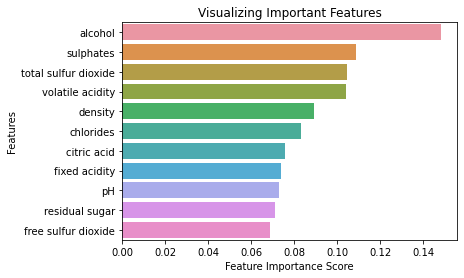

In [27]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();

It seems that all scores are low since all scores are below 0.15. Although from the plot it is not clear which features to be removed, for the next model, I will remove the bottom 3 features based on the barplot and see if the model is doing any better.

## **Model on selected features**

In [28]:
X = df[['alcohol','sulphates','total sulfur dioxide','volatile acidity','density','chlorides','citric acid','fixed acidity']].to_numpy()
y = df[['quality']]

In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [30]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=250, random_state = 1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy: 0.675


It seems that removing the features will make the model worse. Hence, I should not remove any features when modelling the wine dataset.

# **Conclusion**

Overall, the model is successfully fitted using decision trees with an accuracy up to 70.625%. The model is doing decently in predicting the quality of the wine based on the given features.